# CNN 코드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Reshape

import time

In [2]:
# MNIST data

(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# CNN 모델
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


# 학습
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0

# CIFAR10 적용

- CIFAR-10 dataset은 32x32픽셀의 60000개 컬러이미지가 포함되어있으며, 각 이미지는 10개의 클래스로 라벨링이 되어있음.

- MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 dataset중 하나

refered https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape

import time

In [5]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

# 표준화
train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
print(raw_train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


9 truck


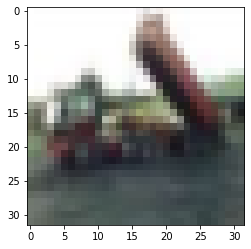

4 deer


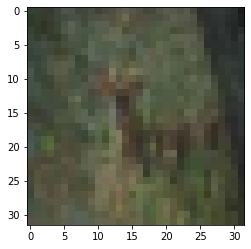

7 horse


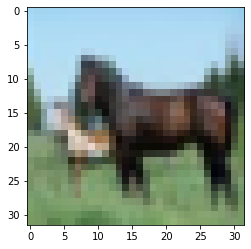

9 truck


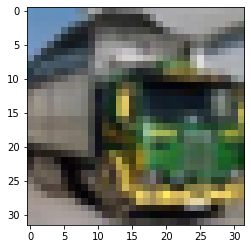

In [7]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [8]:
# CNN 모델
model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((32,32,3)))    # CHANGE <--------------------
# model.add(Reshape((28,28,1)))    # OUT <--------------------
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# 모델 학습
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

# CallBack 이용

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape

import time

In [10]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


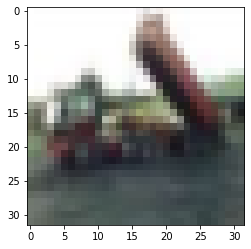

4 deer


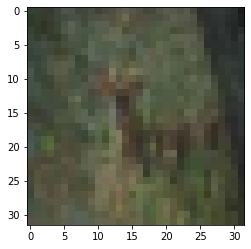

7 horse


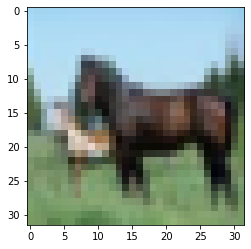

9 truck


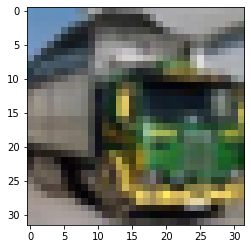

In [11]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [12]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

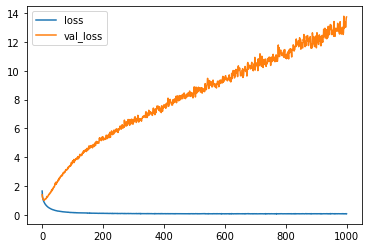

loss =  0.05998445674777031 , val_loss =  13.740263938903809
313/313 [==============================] - 1s 3ms/step - loss: 14.3256 - accuracy: 0.5571
loss= 14.325599670410156
acc= 0.5570999979972839
[5 8 0 ... 5 4 7]


In [13]:
model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


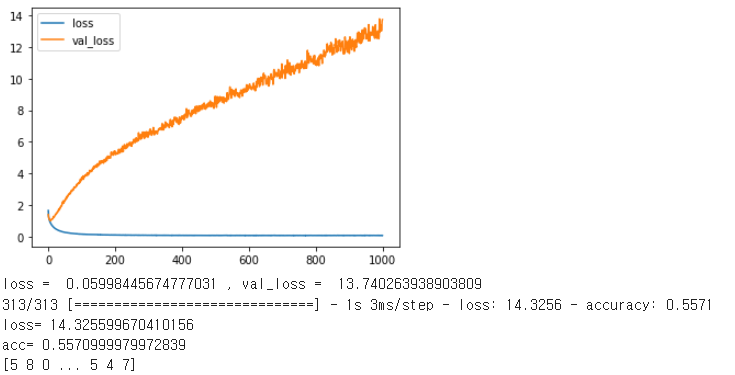

과적합.